# Data Processing

In [3]:
import pandas as pd

In [2]:
data_cab = pd.read_csv("./uber-lyft-cab-prices/cab_rides.csv",delimiter=',')
data_weather = pd.read_csv("./uber-lyft-cab-prices/weather.csv",delimiter=',')

In [3]:
data_cab.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
data_cab = data_cab.drop(columns=['id','product_id'])

In [5]:
data_weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [6]:
from datetime import datetime
data_cab['date_time'] = [datetime.utcfromtimestamp(i/1000).strftime('%Y-%m-%d:%H') for i in data_cab['time_stamp']]
data_cab['date'] = [datetime.utcfromtimestamp(i/1000).strftime('%Y-%m-%d') for i in data_cab['time_stamp']]
data_cab['time'] = [datetime.utcfromtimestamp(i/1000).strftime('%H:%M') for i in data_cab['time_stamp']]
data_cab['weekday'] = [(pd.Timestamp(i)).dayofweek for i in data_cab['date']]
data_cab = data_cab.drop(columns=['time_stamp'])
data_weather['date_time'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d:%H') for i in data_weather['time_stamp']]
data_weather = data_weather.drop(columns=['time_stamp'])

In [7]:
data_cab.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,date,time,weekday
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16:09,2018-12-16,09:30,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28:01,2018-11-28,01:00,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30:04,2018-11-30,04:53,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3


In [8]:
data_weather.head()

,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16:23
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16:23
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16:23
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-16:23
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-16:23


In [9]:
data_cab['date-location'] = data_cab.source.astype(str)+","+data_cab.date_time.astype(str)
data_weather['date-location'] = data_weather.location.astype(str)+","+data_weather.date_time.astype(str)

In [10]:
data_cab.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,date,time,weekday,date-location
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16:09,2018-12-16,09:30,6,"Haymarket Square,2018-12-16:09"
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1,"Haymarket Square,2018-11-27:02"
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28:01,2018-11-28,01:00,2,"Haymarket Square,2018-11-28:01"
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30:04,2018-11-30,04:53,4,"Haymarket Square,2018-11-30:04"
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,"Haymarket Square,2018-11-29:03"


In [11]:
data_weather.head()

,temp,location,clouds,pressure,rain,humidity,wind,date_time,date-location
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16:23,"Back Bay,2018-12-16:23"
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16:23,"Beacon Hill,2018-12-16:23"
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16:23,"Boston University,2018-12-16:23"
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-16:23,"Fenway,2018-12-16:23"
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-16:23,"Financial District,2018-12-16:23"


In [12]:
data_weather.index = data_weather['date-location']
data_merged = data_cab.join(data_weather,on=['date-location'],rsuffix ='_copy')

In [13]:
import numpy as np
data_merged = data_merged[pd.notnull(data_merged['temp'])]
data_merged['rain'] = data_merged['rain'].replace(np.nan,0)

In [14]:
data_merged = data_merged.drop(columns=['date_time_copy','date-location_copy'])

In [15]:
data_merged = data_merged.drop(columns=['date-location','location'])

In [16]:
data_merged[:10]

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,date,time,weekday,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16:09,2018-12-16,09:30,6,38.46,0.29,1022.25,0.0000,0.76,7.68
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1,44.31,1.00,1003.17,0.1123,0.90,13.69
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1,43.82,0.99,1002.59,0.0997,0.89,11.57
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30:04,2018-11-30,04:53,4,35.08,0.00,1013.71,0.0000,0.70,5.25
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,37.58,0.42,998.64,0.0000,0.71,11.30
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,37.80,0.47,998.20,0.0000,0.70,11.02
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,37.66,0.41,998.42,0.0000,0.71,11.16
5,0.44,Lyft,North Station,Haymarket Square,16.5,1.0,Lux Black,2018-12-17:18,2018-12-17,18:25,0,40.78,0.93,1000.15,0.0000,0.79,7.55
6,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,2018-11-26:05,2018-11-26,05:03,0,40.65,0.93,1013.76,0.0000,0.92,3.01
6,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,2018-11-26:05,2018-11-26,05:03,0,40.39,0.92,1013.79,0.0000,0.93,2.71


In [17]:
data_merged.to_csv("./data_merged.csv",index=False,sep=',')

# Map Visulization

In [1]:
import plotly.offline as py
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)
from plotly.graph_objs import Scatter, Layout,Figure
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv("./data_merged.csv",delimiter=',')

In [5]:
dest_lat = ["42.342907","42.352141","42.350666","42.365008","42.364007", "42.340422","42.355976",
            "42.363428","42.358865","42.351884","42.350282","42.366265"]
dest_lon = ["-71.100292","-71.055135","-71.105410","-71.054222","-71.058433", "-71.089269","-71.0549726",
            "-71.066568","-71.0707475","-71.064262","-71.080968","-71.063098"]

In [6]:
mapbox_access_token = "pk.eyJ1IjoiamFjaW5kYTk2IiwiYSI6ImNrNnhnaHhtaDBpMHIza284cjY2djFtZzIifQ.6JXJfAP7R3Lz7vBZpNhc9w"

fig = go.Figure(go.Scattermapbox(
        lat=dest_lat,
        lon=dest_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=["Fenway","South Station","Boston University",
            "North End","Haymarket Square","Northeastern University",
             "Financial District","West End","Beacon Hill",
             "Theatre District","Back Bay","North Station"],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=42.35,
            lon=-71.07
        ),
        pitch=0,
        zoom=12
    ),
)

fig.show()

In [7]:
import psutil
fig.write_image("./chart/boston_map.png")

# Data Distribution

Text(0.5,1,'Cab type distribution')

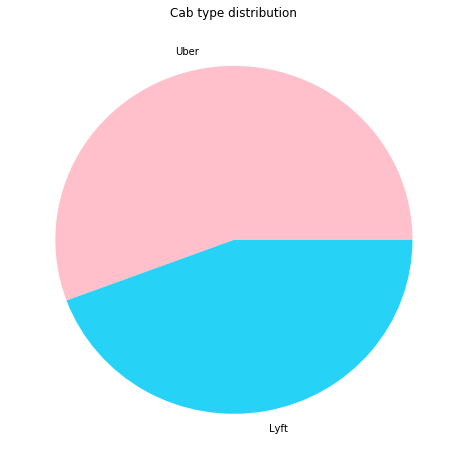

In [9]:
import pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
type_distribution = data_train["cab_type"].value_counts()
plt.pie(type_distribution,radius=None,labels=["Uber", "Lyft"],colors=["#ffc0cb","#26d3f6"])
plt.title('Cab type distribution')

Text(0.5,1,'Cab name distribution')

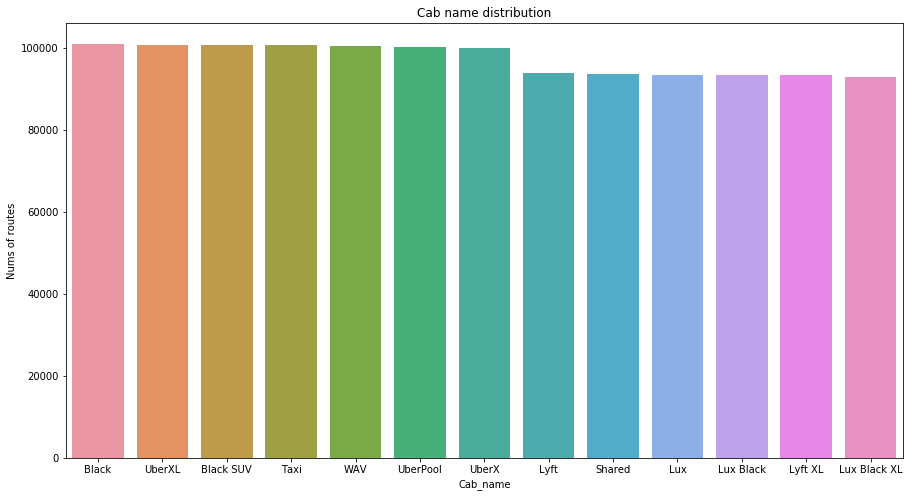

In [28]:
pylab.rcParams['figure.figsize'] = (15.0, 8.0)
name_distribution = data_train["name"].value_counts()
sns.barplot(name_distribution.index, name_distribution.values)
plt.ylabel('Nums of routes')
plt.xlabel("Cab_name")
plt.title('Cab name distribution')

Text(0.5,1,'Distance distribution')

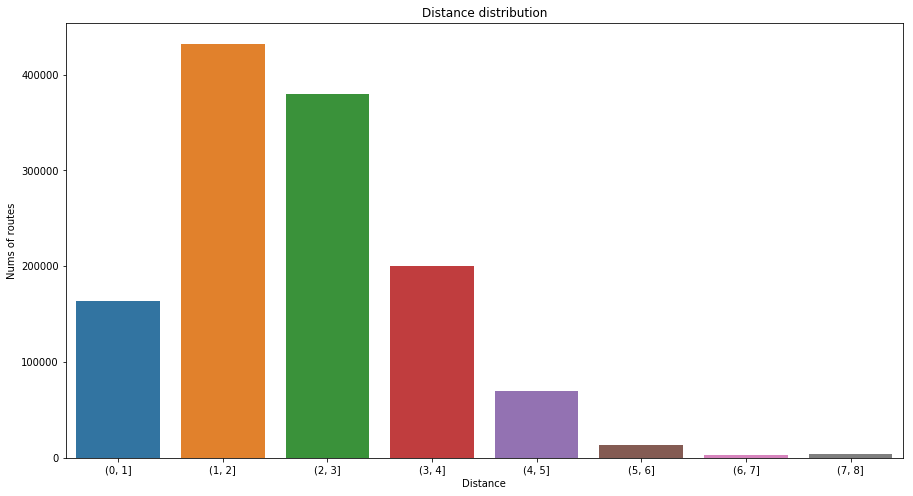

In [29]:
distance_distribution = data_train["distance"]
dist_range=list(range(0,9,1))
distance_distribution=pd.cut(distance_distribution,dist_range,right=True)
distance_distribution = distance_distribution.value_counts()
sns.barplot(distance_distribution.index, distance_distribution.values)
plt.ylabel('Nums of routes')
plt.xlabel("Distance")
plt.title('Distance distribution')

Text(0.5,1,'Weekday distribution')

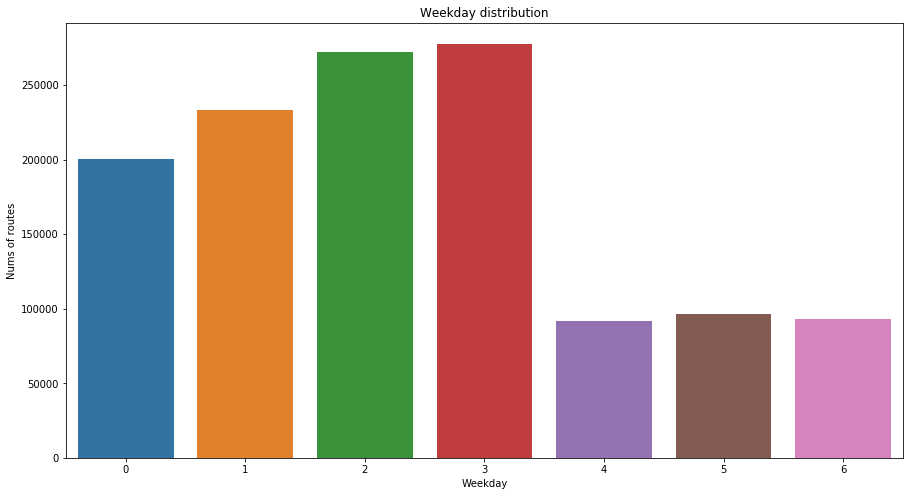

In [30]:
weekday_distribution = data_train["weekday"].value_counts()
sns.barplot(weekday_distribution.index, weekday_distribution.values)
plt.ylabel('Nums of routes')
plt.xlabel("Weekday")
plt.title('Weekday distribution')

Text(0.5,1,'Price distribution')

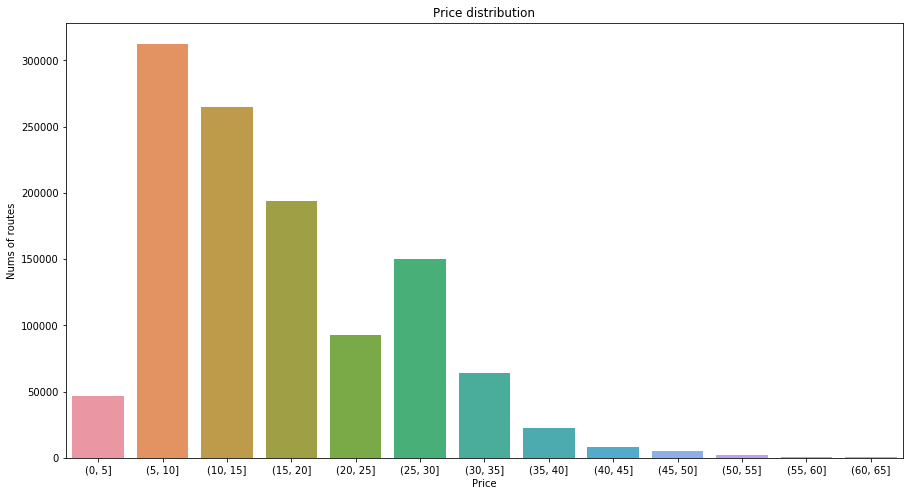

In [31]:
price_distribution = data_train["price"]
price_range=list(range(0,70,5))
price_distribution=pd.cut(price_distribution,price_range,right=True)
price_distribution = price_distribution.value_counts()
sns.barplot(price_distribution.index, price_distribution.values)
plt.ylabel('Nums of routes')
plt.xlabel("Price")
plt.title('Price distribution')

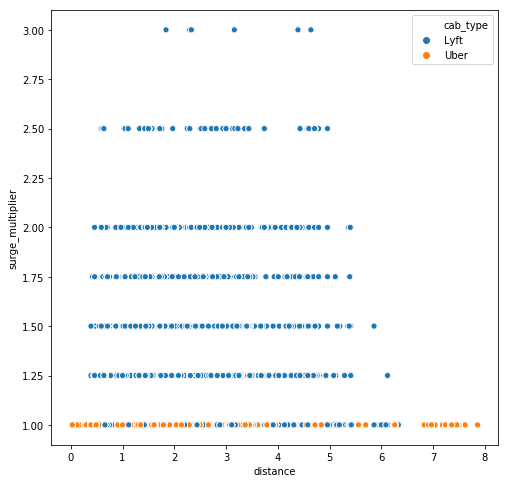

In [11]:
sns.scatterplot(x=data_train["distance"],y=data_train["surge_multiplier"],data=data_train,hue=data_train["cab_type"])

# Price Prediction

In [37]:
import numpy as np
data_train = pd.read_csv("./data_merged.csv",delimiter=',')
data_train['rain'] = data_train.apply(lambda x: int(x['rain']>0.1), axis = 1)
data_train = data_train[data_train['name'] != "Taxi"]
# Random Shuffle
data_train = data_train.sample(frac=1).reset_index(drop=True)

In [38]:
X_des = data_train['destination'].tolist()
X_source = data_train['source'].tolist()
X_name = data_train['name'].tolist()
X_time = data_train['time'].tolist()
X_weekday = data_train['weekday'].tolist()
X_rain = data_train['rain'].tolist()

In [39]:
cab_type_map = {"Lyft":0, "Uber":1}
loc_type = {"North Station":0, "South Station":1, "North End":2, "Northeastern University":3, "Boston University":4,
           "Back Bay":5, "Beacon Hill":6, "Fenway":7,"Financial District":8, "Haymarket Square":9,"West End":10,
            "Theatre District":11}
name_type = {"Shared":0, "Lux":1, "Lux Black XL":2, "Lyft XL":3, "Lux Black":4, "Lyft":5, "UberPool":6,"UberX":7,
             "UberXL":8,"Black":9,"Black SUV":10, "WAV":11}

In [40]:
X_des = [loc_type[i] for i in X_des]
X_source = [loc_type[i] for i in X_source]
X_name = [name_type[i] for i in X_name]
X_time = [int(i.split(':')[0])*24+int(i.split(':')[1]) for i in X_time]

In [41]:
X = np.column_stack((X_des,X_source,X_name,X_time,X_weekday,X_rain))
X = X.tolist()
Y = data_train['price'].tolist()

# Data spliting
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.2,random_state = 43)

# RandomForest 

In [42]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

/Users/apple/Library/Python/3.6/lib/python/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [44]:
#test data 
data_test = pd.read_csv("./data_test.csv",delimiter=',')

X_des_test = data_test['destination'].tolist()
X_source_test = data_test['source'].tolist()
X_name_test = data_test['name'].tolist()
X_time_test = data_test['time'].tolist()
X_weekday_test = data_test['weekday'].tolist()
X_rain_test = data_test['rain'].tolist()

In [45]:
X_des_test = [loc_type[i] for i in X_des_test]
X_source_test = [loc_type[i] for i in X_source_test]
X_name_test = [name_type[i] for i in X_name_test]
X_time_test = [int(i.split(':')[0])*24+int(i.split(':')[1]) for i in X_time_test]

In [46]:
X_test = np.column_stack((X_des_test,X_source_test,X_name_test,X_time_test,X_weekday_test,X_rain_test))
Y_test = data_test['price'].tolist()

In [47]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train[:50000], Y_train[:50000]);

In [48]:
Y_predict_train = rf.predict(X_train[:50000])
errors_train = abs(Y_predict_train - Y_train[:50000])
print('Training Mean Absolute Error:', round(np.mean(errors_train), 2), 'degrees.')
Y_predict_valid = rf.predict(X_valid)
errors_valid = abs(Y_valid - Y_predict_valid)
print('Validation Mean Absolute Error:', round(np.mean(errors_valid), 2), 'degrees.')
Y_test_predict = rf.predict(X_test)
errors_test = abs(Y_test - Y_test_predict)
print('Test Mean Absolute Error:', round(np.mean(errors_test), 2), 'degrees.')

mape_train = 100 * (errors_train / Y_train[:50000])
accuracy_train = 100 - np.mean(mape_train)
print('Train Accuracy:', round(accuracy_train, 2), '%.')

mape_valid = 100 * (errors_valid / Y_valid)
accuracy_valid = 100 - np.mean(mape_valid)
print('Valid Accuracy:', round(accuracy_valid, 2), '%.')

mape_test = 100 * (errors_test / Y_test)
accuracy_test = 100 - np.mean(mape_test)
print('Test Accuracy:', round(accuracy_test, 2), '%.')

Training Mean Absolute Error: 0.62 degrees.
Validation Mean Absolute Error: 1.61 degrees.
Test Mean Absolute Error: 2.29 degrees.
Train Accuracy: 95.95 %.
Valid Accuracy: 89.4 %.
Test Accuracy: 81.99 %.


Text(0.5,1,'Test Set price prediction')

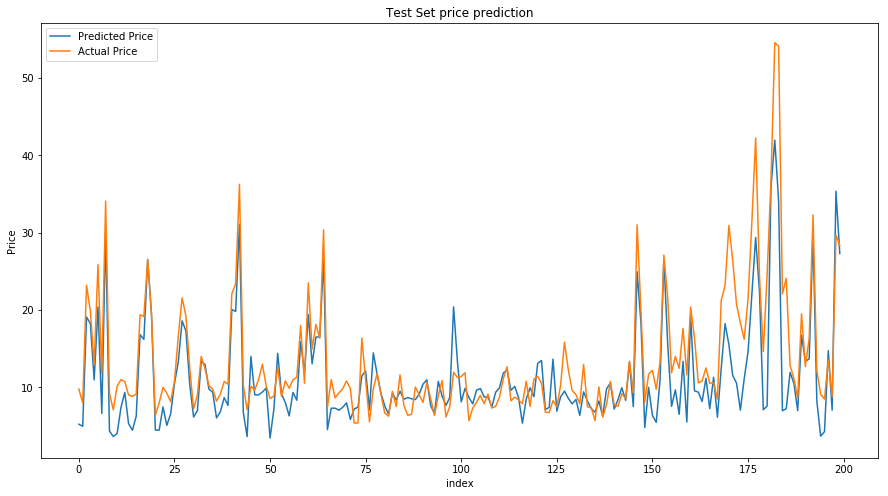

In [49]:
import seaborn as sns
sns.lineplot(range(200),Y_test_predict[:200],label="Predicted Price")
sns.lineplot(range(200),Y_test[:200],label="Actual Price")
plt.legend(loc="upper left")
plt.ylabel('Price')
plt.xlabel("index")
plt.title('Test Set price prediction')

# SVM

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
Y = [int(i) for i in Y]
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.2,random_state = 43)
clf = SVC(gamma='auto')
clf.fit(X_train[:50000], Y_train[:50000])
SVC(gamma='auto')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
Y_predict_train = clf.predict(X_train[:50000])
errors_train = abs(Y_predict_train - Y_train[:50000])
print('Training Mean Absolute Error:', round(np.mean(errors_train), 2), 'degrees.')
Y_predict_valid = clf.predict(X_valid[:10000])
errors_valid = abs(Y_valid[:10000] - Y_predict_valid)
print('Valid Mean Absolute Error:', round(np.mean(errors_valid), 2), 'degrees.')
Y_test_predict = clf.predict(X_test)
errors_test = abs(Y_test - Y_test_predict)
print('Test Mean Absolute Error:', round(np.mean(errors_test), 2), 'degrees.')


mape_svm_train = 100 * (errors_train / Y_train[:50000])
accuracy_train = 100 - np.mean(mape_svm_train)
print('Train Accuracy:', round(accuracy_train, 2), '%.')

mape_svm_valid = 100 * (errors_valid / Y_valid[:10000])
accuracy_svm_valid = 100 - np.mean(mape_svm_valid)
print('Valid Accuracy:', round(accuracy_svm_valid, 2), '%.')

mape_svm_test = 100 * (errors_test / Y_test)
accuracy_test = 100 - np.mean(mape_svm_test)
print('Test Accuracy:', round(accuracy_test, 2), '%.')

Training Mean Absolute Error: 3.06 degrees.
Valid Mean Absolute Error: 6.64 degrees.
Test Mean Absolute Error: 6.01 degrees.
Train Accuracy: 84.56 %.
Valid Accuracy: 59.77 %.
Test Accuracy: 61.56 %.


Text(0.5,1,'Test Set price prediction')

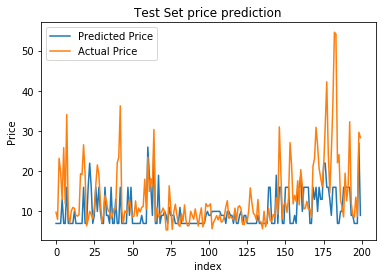

In [32]:
sns.lineplot(range(200),Y_test_predict[:200],label="Predicted Price")
sns.lineplot(range(200),Y_test[:200],label="Actual Price")
plt.legend(loc="upper left")
plt.ylabel('Price')
plt.xlabel("index")
plt.title('Test Set price prediction')

# Decision tree

In [33]:
from sklearn import tree
clf =tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [34]:
Y_predict_train = clf.predict(X_train)
errors_train = abs(Y_predict_train - Y_train)
print('Training Mean Absolute Error:', round(np.mean(errors_train), 2), 'degrees.')

Y_predict_valid = clf.predict(X_valid)
errors_valid = abs(Y_valid - Y_predict_valid)
print('Valid Mean Absolute Error:', round(np.mean(errors_valid), 2), 'degrees.')

Y_test_predict = clf.predict(X_test)
errors_test = abs(Y_test - Y_test_predict)
print('Test Mean Absolute Error:', round(np.mean(errors_test), 2), 'degrees.')

mape_train = 100 * (errors_train / Y_train)
accuracy_train = 100 - np.mean(mape_train)
print('Train Accuracy:', round(accuracy_train, 2), '%.')

mape_valid = 100 * (errors_valid / Y_valid)
accuracy_valid = 100 - np.mean(mape_valid)
print('Valid Accuracy:', round(accuracy_valid, 2), '%.')

mape_test = 100 * (errors_test / Y_test)
accuracy_test = 100 - np.mean(mape_test)
print('Test Accuracy:', round(accuracy_test, 2), '%.')

Training Mean Absolute Error: 0.22 degrees.
Valid Mean Absolute Error: 1.04 degrees.
Test Mean Absolute Error: 2.67 degrees.
Train Accuracy: 98.67 %.
Valid Accuracy: 93.01 %.
Test Accuracy: 79.58 %.


Text(0.5,1,'Test Set price prediction')

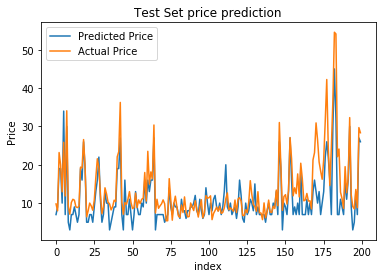

In [35]:
sns.lineplot(range(200),Y_test_predict[:200],label="Predicted Price")
sns.lineplot(range(200),Y_test[:200],label="Actual Price")
plt.legend(loc="upper left")
plt.ylabel('Price')
plt.xlabel("index")
plt.title('Test Set price prediction')